In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | evensk
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | saint-augustin
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | na wa
Processing Record 10 of Set 1 | stonewall
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | goba
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | whitianga
Processing Record 21 of Set 1 | vaini
Processing Record 22

Processing Record 41 of Set 4 | puerto escondido
Processing Record 42 of Set 4 | lima
Processing Record 43 of Set 4 | bonavista
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | bom jardim
Processing Record 46 of Set 4 | mandalgovi
Processing Record 47 of Set 4 | saleaula
City not found. Skipping...
Processing Record 48 of Set 4 | monki
Processing Record 49 of Set 4 | kieta
Processing Record 50 of Set 4 | gemunden
Processing Record 1 of Set 5 | krasnyy yar
Processing Record 2 of Set 5 | brooks
Processing Record 3 of Set 5 | corn island
Processing Record 4 of Set 5 | akyab
Processing Record 5 of Set 5 | tiksi
Processing Record 6 of Set 5 | nadym
Processing Record 7 of Set 5 | markova
Processing Record 8 of Set 5 | soyo
Processing Record 9 of Set 5 | manono
Processing Record 10 of Set 5 | port hedland
Processing Record 11 of Set 5 | la ronge
Processing Record 12 of Set 5 | hambantota
Processing Record 13 of Set 5 | amderma
City not found. Skipping...
Processing Reco

Processing Record 32 of Set 8 | katsuura
Processing Record 33 of Set 8 | yerbogachen
Processing Record 34 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 35 of Set 8 | san patricio
Processing Record 36 of Set 8 | kaoma
Processing Record 37 of Set 8 | vila franca do campo
Processing Record 38 of Set 8 | hamilton
Processing Record 39 of Set 8 | alyangula
Processing Record 40 of Set 8 | lorengau
Processing Record 41 of Set 8 | zabol
Processing Record 42 of Set 8 | srednekolymsk
Processing Record 43 of Set 8 | mizan teferi
Processing Record 44 of Set 8 | ostersund
Processing Record 45 of Set 8 | mana
Processing Record 46 of Set 8 | salantai
Processing Record 47 of Set 8 | constitucion
Processing Record 48 of Set 8 | kawalu
Processing Record 49 of Set 8 | erenhot
Processing Record 50 of Set 8 | atambua
Processing Record 1 of Set 9 | san jose
Processing Record 2 of Set 9 | kindu
Processing Record 3 of Set 9 | mayuge
Processing Record 4 of Set 9 | chara
Processing Record 5 

Processing Record 20 of Set 12 | abilene
Processing Record 21 of Set 12 | buraydah
Processing Record 22 of Set 12 | ardakan
Processing Record 23 of Set 12 | severnoye
Processing Record 24 of Set 12 | kholodnyy
Processing Record 25 of Set 12 | maumere
Processing Record 26 of Set 12 | plettenberg bay
Processing Record 27 of Set 12 | marcona
City not found. Skipping...
Processing Record 28 of Set 12 | podor
Processing Record 29 of Set 12 | hailar
Processing Record 30 of Set 12 | ayer itam
City not found. Skipping...
Processing Record 31 of Set 12 | riyadh
Processing Record 32 of Set 12 | ubata
Processing Record 33 of Set 12 | ardistan
City not found. Skipping...
Processing Record 34 of Set 12 | mackay
Processing Record 35 of Set 12 | aneby
Processing Record 36 of Set 12 | milkovo
Processing Record 37 of Set 12 | de aar
Processing Record 38 of Set 12 | mahibadhoo
Processing Record 39 of Set 12 | muros
Processing Record 40 of Set 12 | mokhsogollokh
Processing Record 41 of Set 12 | khandbari

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.4833,-151.7500,78.55,79,34,8.34,PF,2021-10-28 22:07:56
1,Evensk,61.9500,159.2333,18.03,95,100,6.06,RU,2021-10-28 22:07:56
2,Tuktoyaktuk,69.4541,-133.0374,27.45,85,100,4.09,CA,2021-10-28 22:07:57
3,Saint-Augustin,51.2260,-58.6502,38.39,79,0,4.29,CA,2021-10-28 22:07:57
4,Ribeira Grande,38.5167,-28.7000,69.28,92,90,26.96,PT,2021-10-28 22:07:57
5,Atuona,-9.8000,-139.0333,78.66,67,1,16.53,PF,2021-10-28 22:07:58
6,Sao Filipe,14.8961,-24.4956,79.00,79,100,12.17,CV,2021-10-28 22:07:58
7,Lompoc,34.6391,-120.4579,91.71,28,1,12.66,US,2021-10-28 22:06:35
8,Na Wa,17.4897,104.1006,70.90,87,98,3.96,TH,2021-10-28 22:07:59
9,Stonewall,50.1344,-97.3268,51.98,59,23,9.26,CA,2021-10-28 22:07:59


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faanui,PF,2021-10-28 22:07:56,-16.4833,-151.7500,78.55,79,34,8.34
1,Evensk,RU,2021-10-28 22:07:56,61.9500,159.2333,18.03,95,100,6.06
2,Tuktoyaktuk,CA,2021-10-28 22:07:57,69.4541,-133.0374,27.45,85,100,4.09
3,Saint-Augustin,CA,2021-10-28 22:07:57,51.2260,-58.6502,38.39,79,0,4.29
4,Ribeira Grande,PT,2021-10-28 22:07:57,38.5167,-28.7000,69.28,92,90,26.96
...,...,...,...,...,...,...,...,...,...
579,Yalova,TR,2021-10-28 22:11:03,40.6550,29.2769,58.84,74,25,11.63
580,Cessnock,AU,2021-10-28 22:11:04,-32.8333,151.3500,81.34,49,100,12.08
581,Sarakhs,IR,2021-10-28 22:11:04,36.5449,61.1577,44.56,74,0,6.02
582,Luderitz,NA,2021-10-28 22:11:04,-26.6481,15.1594,57.85,89,3,5.88


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

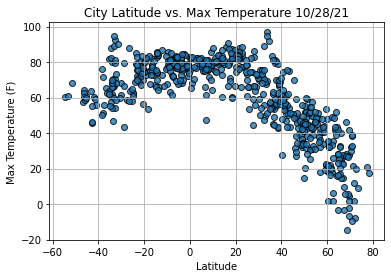

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

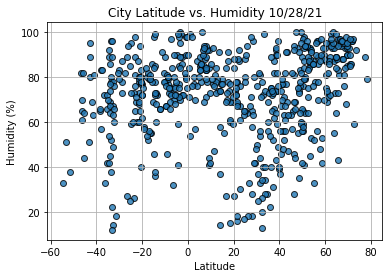

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

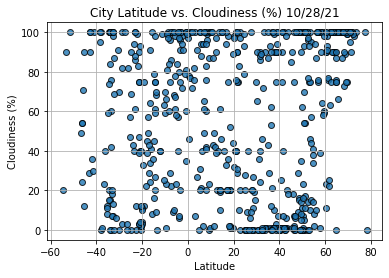

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

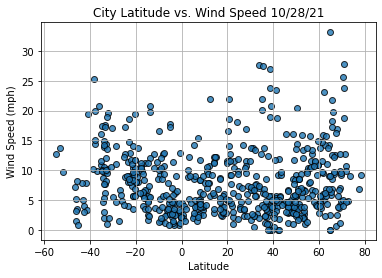

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [22]:
#row = df.loc[row_index]

index13 = city_data_df.loc[13]
index13


City                         Goba
Country                        ET
Date          2021-10-28 22:08:00
Lat                        7.0167
Lng                       39.9833
Max Temp                    47.41
Humidity                       85
Cloudiness                     49
Wind Speed                   4.25
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Evensk,RU,2021-10-28 22:07:56,61.9500,159.2333,18.03,95,100,6.06
2,Tuktoyaktuk,CA,2021-10-28 22:07:57,69.4541,-133.0374,27.45,85,100,4.09
3,Saint-Augustin,CA,2021-10-28 22:07:57,51.2260,-58.6502,38.39,79,0,4.29
4,Ribeira Grande,PT,2021-10-28 22:07:57,38.5167,-28.7000,69.28,92,90,26.96
6,Sao Filipe,CV,2021-10-28 22:07:58,14.8961,-24.4956,79.00,79,100,12.17


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

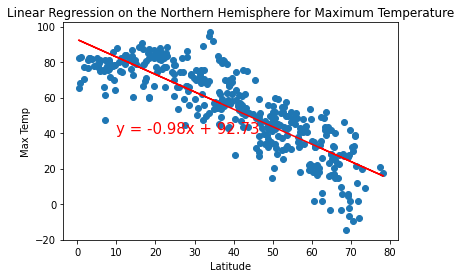

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

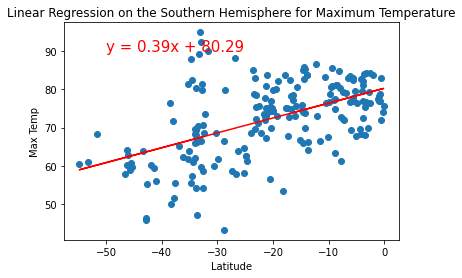

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

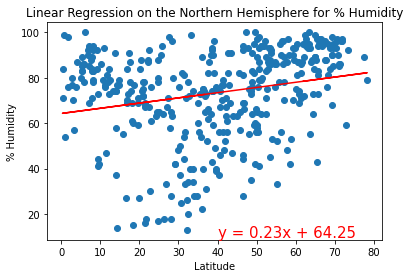

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

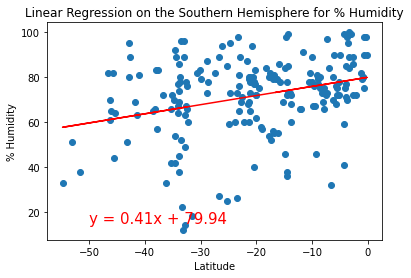

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

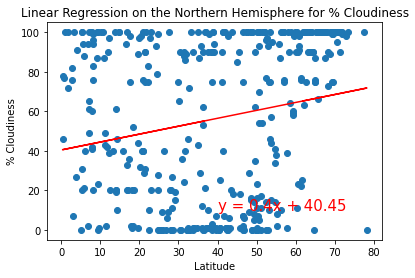

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

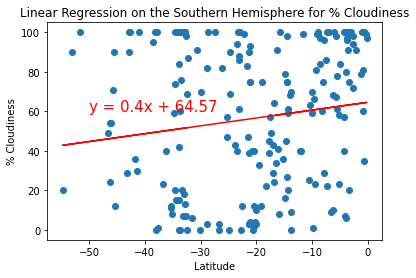

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

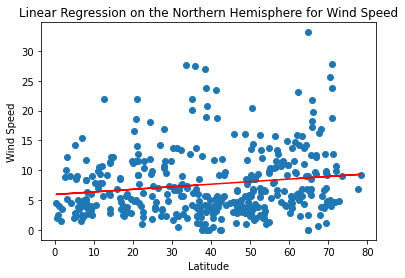

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

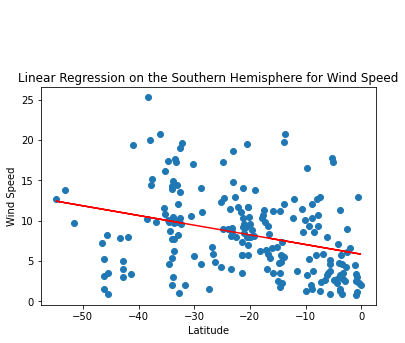

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))